In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import KFold 

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report


# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Resources/original_data.csv")
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [4]:
df.dtypes==object

ID                 False
Gender             False
Own_car            False
Own_property       False
Work_phone         False
Phone              False
Email              False
Unemployed         False
Num_children       False
Num_family         False
Account_length     False
Total_income       False
Age                False
Years_employed     False
Income_type         True
Education_type      True
Family_status       True
Housing_type        True
Occupation_type     True
Target             False
dtype: bool

In [8]:
str_cols = df.dtypes[df.dtypes==object].index.tolist()
str_cols

['Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type']

In [11]:
df.loc[:, str_cols].nunique()

Income_type         5
Education_type      5
Family_status       5
Housing_type        6
Occupation_type    19
dtype: int64

In [12]:
df.Occupation_type.value_counts()

Occupation_type
Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                   623
High skill tech staff     357
Accountants               300
Medicine staff            291
Cooking staff             193
Security staff            182
Cleaning staff            146
Private service staff      86
Low-skill Laborers         53
Secretaries                46
Waiters/barmen staff       40
HR staff                   22
IT staff                   18
Realty agents              16
Name: count, dtype: int64

In [20]:
df2 = df.copy()

In [17]:
occupations_to_replace

['Private service staff',
 'Low-skill Laborers',
 'Secretaries',
 'Waiters/barmen staff',
 'HR staff',
 'IT staff']

In [21]:
# Choose a cutoff value and create a list of occupations to be replaced
occupations_to_replace = list(df2['Occupation_type'].value_counts().loc[df2['Occupation_type'].value_counts() < 100].index)

# Replace in dataframe
for cls in occupations_to_replace:
    df2['Occupation_type'] = df2['Occupation_type'].replace(cls,"Other")

# Check to make sure binning was successful
df2['Occupation_type'].value_counts()

Occupation_type
Other                    3275
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                   623
High skill tech staff     357
Accountants               300
Medicine staff            291
Cooking staff             193
Security staff            182
Cleaning staff            146
Name: count, dtype: int64

In [22]:
df2 = pd.get_dummies(df2, dtype=int)
df2.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Student,Income_type_Working,Education_type_Academic degree,Education_type_Higher education,Education_type_Incomplete higher,Education_type_Lower secondary,Education_type_Secondary / secondary special,Family_status_Civil marriage,Family_status_Married,Family_status_Separated,Family_status_Single / not married,Family_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Occupation_type_Accountants,Occupation_type_Cleaning staff,Occupation_type_Cooking staff,Occupation_type_Core staff,Occupation_type_Drivers,Occupation_type_High skill tech staff,Occupation_type_Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Sales staff,Occupation_type_Security staff
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # Preprocessing: Convert categorical variables into numerical values
# le = LabelEncoder()
# df['Income_type'] = le.fit_transform(df['Income_type'])
# df['Education_type'] = le.fit_transform(df['Education_type'])
# df['Family_status'] = le.fit_transform(df['Family_status'])
# df['Housing_type'] = le.fit_transform(df['Housing_type'])
# df['Occupation_type'] = le.fit_transform(df['Occupation_type'])
# df.head()

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            9709 non-null   int64  
 1   Gender                                        9709 non-null   int64  
 2   Own_car                                       9709 non-null   int64  
 3   Own_property                                  9709 non-null   int64  
 4   Work_phone                                    9709 non-null   int64  
 5   Phone                                         9709 non-null   int64  
 6   Email                                         9709 non-null   int64  
 7   Unemployed                                    9709 non-null   int64  
 8   Num_children                                  9709 non-null   int64  
 9   Num_family                                    9709 non-null   i

In [24]:
df2.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Student,Income_type_Working,Education_type_Academic degree,Education_type_Higher education,Education_type_Incomplete higher,Education_type_Lower secondary,Education_type_Secondary / secondary special,Family_status_Civil marriage,Family_status_Married,Family_status_Separated,Family_status_Single / not married,Family_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Occupation_type_Accountants,Occupation_type_Cleaning staff,Occupation_type_Cooking staff,Occupation_type_Core staff,Occupation_type_Drivers,Occupation_type_High skill tech staff,Occupation_type_Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Sales staff,Occupation_type_Security staff
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145,0.238130,0.176331,0.074364,0.000309,0.510866,0.000618,0.253064,0.038212,0.011742,0.696364,0.086106,0.672572,0.059120,0.139973,0.042229,0.003502,0.894428,0.033268,0.007828,0.014832,0.046143,0.030899,0.015038,0.019878,0.090329,0.064167,0.036770,0.177567,0.080544,0.029972,0.337316,0.098774,0.018745
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666,0.425961,0.381121,0.262376,0.017576,0.499908,0.024853,0.434790,0.191717,0.107727,0.459851,0.280534,0.469299,0.235862,0.346977,0.201121,0.059076,0.307305,0.179345,0.088132,0.120885,0.209805,0.173053,0.121709,0.139590,0.286667,0.245063,0.188206,0.382168,0.272147,0.170519,0.472818,0.298374,0.135632
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41

In [25]:
df2.corr()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Student,Income_type_Working,Education_type_Academic degree,Education_type_Higher education,Education_type_Incomplete higher,Education_type_Lower secondary,Education_type_Secondary / secondary special,Family_status_Civil marriage,Family_status_Married,Family_status_Separated,Family_status_Single / not married,Family_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Occupation_type_Accountants,Occupation_type_Cleaning staff,Occupation_type_Cooking staff,Occupation_type_Core staff,Occupation_type_Drivers,Occupation_type_High skill tech staff,Occupation_type_Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Sales staff,Occupation_type_Security staff
ID,1.000000,0.014427,-0.003829,-0.071906,0.067723,0.005400,-0.025062,-0.029437,0.021149,0.015102,-0.005465,-0.003212,-0.040211,-0.019097,0.000384,0.008787,-0.028888,-0.005028,-0.020823,0.017908,-0.000348,0.008918,-0.002046,-0.015473,-0.003935,-0.010151,0.000922,-0.004794,0.018005,-0.013433,0.007503,-0.014527,-0.000994,0.017349,0.003215,0.010875,0.007703,0.004354,0.003667,-0.009081,-0.007623,-0.004033,0.011863,-0.003221,0.013148,-0.007688,0.002028,-0.000099
Gender,0.014427,1.000000,0.355420,-0.056067,0.059095,-0.019123,0.006548,-0.168753,0.054211,0.078460,-0.008431,0.200750,-0.173157,-0.028231,0.015033,0.039421,-0.167325,-0.047610,-0.000569,0.118984,-0.000804,-0.015348,0.023239,0.008512,0.002872,-0.032785,0.090115,-0.057896,0.024325,-0.138613,0.018814,-0.048200,-0.023675,0.040452,0.044305,0.043020,-0.118179,-0.077989,-0.062411,-0.084331,0.330489,-0.004023,0.227210,0.089962,-0.117225,-0.165544,-0.153891,0.113980
Own_car,-0.003829,0.355420,1.000000,-0.010190,0.029406,0.004253,0.022261,-0.145493,0.089565,0.138548,0.025058,0.221874,-0.127670,0.019096,-0.006787,0.058112,-0.143770,-0.010160,-0.013407,0.065895,0.006823,0.092152,0.024049,-0.025616,-0.091524,-0.026954,0.145623,-0.058019,-0.076159,-0.102769,0.012649,0.011743,-0.033074,0.014676,-0.006978,0.005366,0.024305,-0.059121,-0.048919,-0.020472,0.192576,0.014450,0.036380,0.116531,-0.050111,-0.129765,-0.038392,0.011149
Own_property,-0.071906,-0.056067,-0.010190,1.000000,-0.184285,-0.052136,0.056014,0.086675,-0.000480,0.008782,-0.009627,0.025562,0.134602,-0.021443,-0.028227,-0.003401,0.085926,-0.024954,-0.000182,-0.049508,0.017391,-0.005033,-0.023042,0.002940,0.012737,-0.002665,0.019549,0.000497,-0.037688,0.022538,-0.003090,0.208629,-0.130735,-0.052351,-0.050259,-0.142010,-0.003121,0.019740,0.014757,-0.019082,-0.038814,0.010790,-0.019362,-0.000117,0.002034,0.046710,-0.016912,-0.006825
Work_phone,0.067723,0.059095,0.029406,-0.184285,1.000000,0.288331,-0.040473,-0.242499,0.052890,0.062499,0.015013,-0.030854,-0.180719,0.107966,-0.002919,0.004284,-0.241263,0.020003,-0.009267,0.170112,-0.013107,0.006192,0.034300,0.002812,-0.020105,0.025129,0.021922,-0.006144,-0.015461,-0.052326,0.002568,-0.029364,-0.000319,0.012681,0.007623,0.032840,0.037187,0.008731,0.001854,0.042958,0.039273,0.016423,0.046493,0.049521,0.011318,-0.166398,0.037231,0.011835
Phone,0.005400,-0.019123,0.004253,-0.052136,0.288331,1.000000,0.007631,0.000066,-0.023997,-0.013669,0.021386,0.021051,0.044856,0.041816,-0.009461,0.011167,0.002094,-0.007544,-0.011172,-0.006759,0.020819,0.042491,0.009820,-0.005903,-0.044011,-0.013378,0.019640,0.021105,-0.037999,0.013638,-0.003007,0.022852,0.006448,-0.007392,-0.034681,-0.015050,0.023271,-0.022435,-0.018779,0.011678,-0.000204,0.018499,-0.026165,0.010904,0.003053,0.007641,-0.000669,-0.017374
Email,-0.025062,0.006548,0.022261,0.056014,-0.040473,0.007631,1.000000,-0.081081,0.010271,0.004601,-0.024376,0.092321,-0.110262,-0.0047

In [26]:
df2.Target.value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

In [ ]:
# we have an imbalance - so it may be hard to predict

In [37]:
# features
X = df2.drop(["Target", "ID"], axis=1) # keep ALL features except for the target

# target
y = df2.Target

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

print(X_train.shape)
print(X_test.shape)

(7281, 46)
(2428, 46)


In [ ]:
#  # Create the StandardScaler instance
# scaler = StandardScaler()
# # Fit the Standard Scaler with the training data
# X_scaler = scaler.fit(X_train)
# # Scale the training data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [38]:
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix: 
    {train_cm}

    Train Report: 
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix: 
    {test_cm}

    Test Report: 
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

TRAINING METRICS

    Train Confusion Matrix: 
    [[6319    0]
 [ 962    0]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.87      1.00      0.93      6319
           1       0.00      0.00      0.00       962

    accuracy                           0.87      7281
   macro avg       0.43      0.50      0.46      7281
weighted avg       0.75      0.87      0.81      7281

    



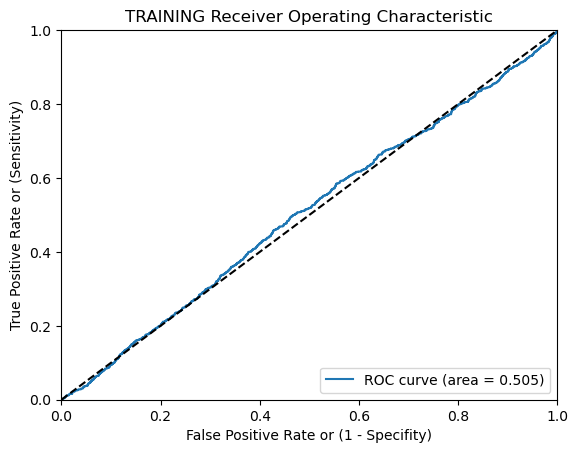



TESTING METRICS

    Test Confusion Matrix: 
    [[2107    0]
 [ 321    0]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.87      1.00      0.93      2107
           1       0.00      0.00      0.00       321

    accuracy                           0.87      2428
   macro avg       0.43      0.50      0.46      2428
weighted avg       0.75      0.87      0.81      2428

    



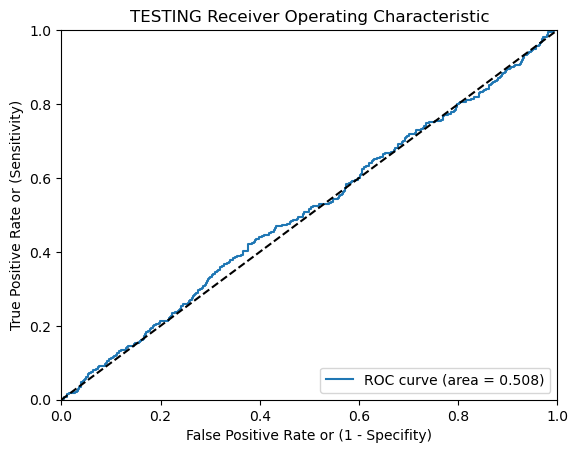

In [39]:
# initialize
lr = LogisticRegression()

# fit
lr.fit(X_train, y_train)

doClassification(lr, X_train, X_test, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[6319    0]
 [ 960    2]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.87      1.00      0.93      6319
           1       1.00      0.00      0.00       962

    accuracy                           0.87      7281
   macro avg       0.93      0.50      0.47      7281
weighted avg       0.89      0.87      0.81      7281

    



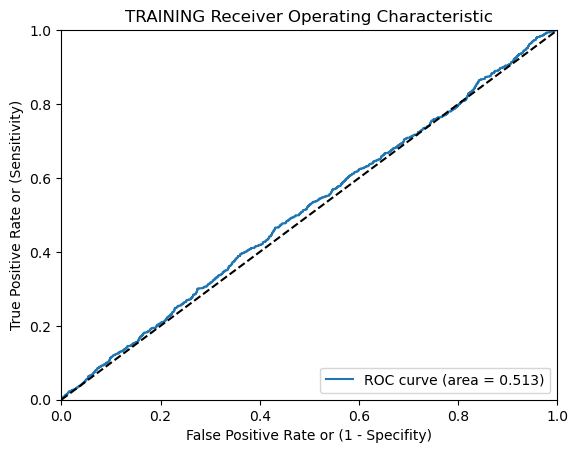



TESTING METRICS

    Test Confusion Matrix: 
    [[2107    0]
 [ 321    0]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.87      1.00      0.93      2107
           1       0.00      0.00      0.00       321

    accuracy                           0.87      2428
   macro avg       0.43      0.50      0.46      2428
weighted avg       0.75      0.87      0.81      2428

    



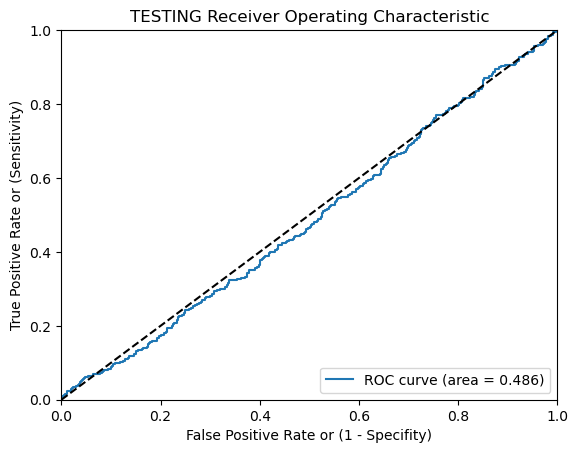

In [40]:
# initialize
sv = SVC(probability=True)

# fit
sv.fit(X_train, y_train)

doClassification(sv, X_train, X_test, y_train, y_test)

In [41]:
# initialize
knn = KNeighborsClassifier(n_neighbors=7)

# fit
knn.fit(X_train, y_train)

doClassification(knn, X_train, X_test, y_train, y_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
# initialize
dt = DecisionTreeClassifier(random_state=42)

# fit
dt.fit(X_train_scaled, y_train)

doClassification(dt, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
# Decision tree has the lowest number of false negatives (max recall), so this is the best model.

In [ ]:
# initialize
rf = RandomForestClassifier(random_state=42)

# fit
rf.fit(X_train_scaled, y_train)

doClassification(rf, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
# initialize
ada = AdaBoostClassifier(random_state=42)

# fit
ada.fit(X_train_scaled, y_train)

doClassification(ada, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
# initialize
gb = GradientBoostingClassifier(random_state=42)

# fit
gb.fit(X_train_scaled, y_train)

doClassification(gb, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
# Decision Tree

In [ ]:
text_representation = tree.export_text(dt)
print(text_representation)

In [ ]:
dt_feature_names=list(X.columns)
dt_target_names=[str(s) for s in y.unique()]

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=dt_feature_names, class_names=dt_target_names, filled=True)
plt.show()

In [42]:
# K-Fold Validation
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.870236869207003, 0.88259526261586, 0.8872296601441813, 0.8789907312049433, 0.8201957753735188]
Avg accuracy : 0.8678496597091012
